<a href="https://colab.research.google.com/github/kallebcintra/Artificial-Intelligence/blob/main/Atividade%20A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício 1:

Considere o seguinte jogo de dois jogadores:

> O jogo começa com um número inteiro N escolhido aleatoriamente. \
> A seguir, o jogo segue em turnos entre os jogadores P(+1) e P(-1). \
> Em cada turno, o jogador da rodada deve escolher entre duas ações: \
>  - decrementar N (N - 1)
>  - dividir N por 2 e arredondar para baixo (N//2)
>
> O jogador que terminar com 0 é o vencedor.

Exemplos de jogo:

> N sorteado: 1 \
> N = 1 \
> P(+1): N - 1 \
> N = 0 \
> P(-1) -> Vencedor \

=======================

> N sorteado: 10 \
> N = 10 \
> P(+1): N - 1 \
> N = 9 \
> P(-1): N//2 \
> N = 4 \
> P(+1): N - 1 \
> N = 3 \
> P(-1): N - 1 \
> N = 2 \
> P(+1): N//2 \
> N = 1 \
> P(-1): N - 1 \
> N = 0 \
> P(+1) -> Vencedor \

=======================

In [ ]:
from random import randint

class HalvingGame:
    def __init__(self, N_start=None, max_N=20):
        if not N_start: N_start = randint(1, max_N)
        self.N_start = N_start

    def startState(self):
        player = +1
        return (player, self.N_start)

    def isEnd(self, state):
        p, N = state
        return N == 0

    def utility(self, state):
        p, N = state
        assert N == 0
        return p*float('inf')

    def actions(self, state):
        return ['-', '/']

    def player(self, state):
        p, N = state
        return p

    def successor(self, state, action):
        p, N = state
        if action == '-':
            return (-p, N - 1)
        if action == '/':
            return (-p, N//2)

def humanPolicy(game, state):
    while True:
        action = input(f'P({state[0]}) [- or /]: ')
        if action in game.actions(state):
            return action

def run_game(policies, N_start=None, max_N=20):
    game = HalvingGame(N_start, max_N)
    state = game.startState()
    while not game.isEnd(state):
        print('='*10, state)
        player = game.player(state)
        policy = policies[player]
        action = policy(game, state)
        state = game.successor(state, action)

    print(f'\nGanhador = P({state[0]})')
    print(f'utility = {game.utility(state)}')

    # retorna o ganhador
    return state[0]

Experimente o jogo com um amigo na célula abaixo.

In [ ]:
policies = {+1: humanPolicy, -1: humanPolicy}
winner = run_game(policies, max_N=10) # experimente com diferentes valores de max_N ou para valores fixo de N_start

========== (1, 10)
P(1) [- or /]: -
========== (-1, 9)
P(-1) [- or /]: /
========== (1, 4)
P(1) [- or /]: -
========== (-1, 3)
P(-1) [- or /]: /
========== (1, 1)
P(1) [- or /]: -

Ganhador = P(-1)
utility = -inf


Implemente a política minimax para o jogo.

> **Nota:** nesta política _minimax_ não será adotado o _max()_ sempre que for necessário entender a melhor jogada para o jogador principal, uma vez que P(-1) possui _utility_ como **-inf** caso ganhe, _minimax_ irá minimizar para ele e maximizar para P(+1).

In [ ]:
def minimaxPolicy(game, state):
    def V_minimax(state):
      if game.isEnd(state):
        return (game.utility(state), None)

      actions = game.actions(state)
      player = game.player(state)


      V_values = [(V_minimax(game.successor(state, action))[0], action)
                  for action in actions]

      eval = max(V_values) if player == 1 else min(V_values)
      return eval

    utility, action = V_minimax(state)
    print(f'  --> P({state[0]}): política minimax toma a ação {action} com utility {utility}')
    return action

In [ ]:
policies = {+1: humanPolicy, -1: minimaxPolicy}
winner = run_game(policies, N_start = 21)

========== (1, 21)
P(1) [- or /]: -
========== (-1, 20)
  --> P(-1): política minimax toma a ação / com utility -inf
========== (1, 10)
P(1) [- or /]: /
========== (-1, 5)
  --> P(-1): política minimax toma a ação - com utility -inf
========== (1, 4)
P(1) [- or /]: /
========== (-1, 2)
  --> P(-1): política minimax toma a ação - com utility -inf
========== (1, 1)
P(1) [- or /]: -

Ganhador = P(-1)
utility = -inf


Coloque duas políticas minimax como adversárias e varie *N_start* entre 1 e o maior valor possível com o tempo de execução máxima de 3s. \
Mostre em gráficos o crescimento no tempo de execução do jogo com o crescimento de N_start.

In [ ]:
%%capture

from timeit import default_timer as timer

policies = {+1: minimaxPolicy, -1: minimaxPolicy}

start_size = 1

instances = []
exec_times = []
winners = []

while True:
  start = timer()
  winner = run_game(policies, N_start = start_size)
  finish = timer()

  delta_T = finish - start
  if delta_T > 3:
    break

  winners.append(winner)
  exec_times.append(delta_T)
  instances.append(start_size)
  start_size += 1

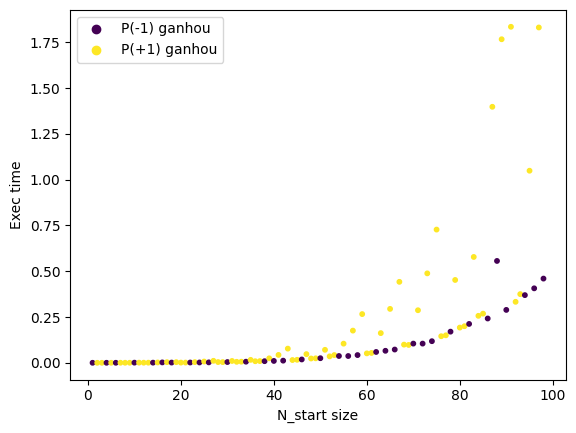

In [ ]:
import matplotlib.pyplot as plt

scatter = plt.scatter(instances, exec_times, c=winners, s=10)

plt.xlabel('N_start size')
plt.ylabel('Exec time')
plt.legend(handles=scatter.legend_elements()[0], labels=['P(-1) ganhou', 'P(+1) ganhou'])
plt.show()

Descreva possibilidades de como otimizar a política de minimax para ser possível executar jogadas ótimas com um número maior que o máximo *N_start* conseguido no item anterior.

## Resposta:
Analisando a implementação da política _minimax_ uma boa forma de melhora-lá seria com programação dinâmica, salvado o jogador que ganharia de uma dada posição caso ambos jogassem de maneira ótima. Se o jogador estiver destinado a perder, não importa a decisão de _minimax_ então aproveitaria bastante tempo.

# Exercício 2:

Execute as céculas abaixo para instalar e importar o pacote necessário para o exercício.

In [ ]:
!pip install gymnasium

In [ ]:
import gymnasium as gym

## Gymnasium

O [Gymnasium](https://gymnasium.farama.org/) visa fornecer um benchmark fácil de configurar com uma ampla variedade de ambientes diferentes. O objetivo é padronizar como os ambientes são definidos nas publicações de pesquisa de IA para que as pesquisas publicadas se tornem mais facilmente reprodutíveis. O projeto pretende fornecer ao usuário uma interface simples.


A peça central do Gym é o ambiente, que define o problema em que seu algoritmo de reforço atuará.

O ambiente possui alguns métodos básicos:

- **reset**: reinicia o ambiente ao seu estado inicial
- **step**: Dá um passo adiante na simulação do ambiente
  - retorna uma observação, a recomensa, um sinalizador de término do episódio, e informações adicionais (caso relevantes).
- **render**: renderiza o ambiente para visualização de seu estado atuado (Não utilizado neste notebook)
  - retorna apenas a observação inicial.

Abaixo temos um ambiente FrozenLake [https://gymnasium.farama.org/environments/toy_text/frozen_lake/#frozen-lake] que representa um MDP que será utilizado na atividade.

In [ ]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)

## Agent

Abaixo temos o esqueleto de um agente que utiliza o algoritmo Q-learning para aprender a maximizar o retorno esperado no ambiente onde estiver interagindo.

In [ ]:
from collections import defaultdict
import numpy as np
import random

class FrozenLakeAgent:
    def __init__(
        self,
        learning_rate: float,
        initial_epsilon: float,
        epsilon_decay: float,
        final_epsilon: float,
        discount_factor: float,
    ):
        """Inicializa um agente de RL com um dict vazio de q_values,
        uma taxa de aprendizado e um epsilon.

        Args:
            learning_rate: taxa de aprendizado
            initial_epsilon: valor inicial de epsilon
            epsilon_decay: fator de decaimento de epsilon
            final_epsilon: valor final de epsilon
            discount_factor: fator de disconto para calcular os q_values
        """
        self.q_values = defaultdict(lambda: np.zeros(env.action_space.n))

        self.lr = learning_rate
        self.discount_factor = discount_factor

        self.epsilon = initial_epsilon
        self.epsilon_decay = epsilon_decay
        self.final_epsilon = final_epsilon


    def get_action(self, state):
        if random.random() < self.epsilon:
          return env.action_space.sample()
        else:
          max_value = max(self.q_values[state])
          best_actions = []

          for i in [0, 1, 2, 3]:
            if self.q_values[state][i] == max_value:
              best_actions.append(i)

          return random.choice(best_actions)


    def update(
        self,
        state,
        action,
        reward,
        done,
        next_state,
    ):
        self.q_values[state][action] = (1 - self.lr) * self.q_values[state][action] \
        + self.lr * (reward + self.discount_factor*max(self.q_values[next_state]))
        return

    def decay_epsilon(self):
        self.epsilon = max(self.final_epsilon, self.epsilon - self.epsilon_decay)

In [ ]:
# hyperparameters

def create_Agent(
    learning_rate = 0.2,
    discount_factor = 0.9,
    start_epsilon = 0.95,
    final_epsilon = 0.005,
    n_episodes = 1e3
  ):
  epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time


  agent = FrozenLakeAgent(
      learning_rate = learning_rate,
      discount_factor = discount_factor,
      initial_epsilon = start_epsilon,
      epsilon_decay = epsilon_decay,
      final_epsilon = final_epsilon)

  return agent

## Fluxo de Interação

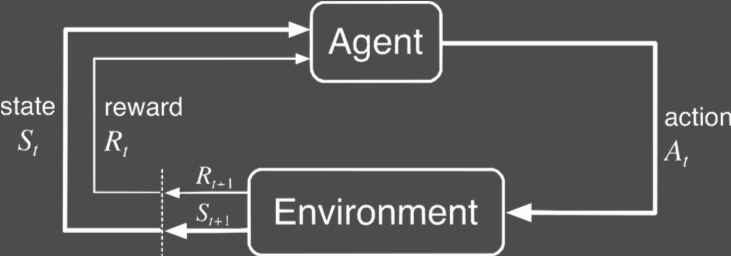

O fluxo de interação entre um agente e um ambiente durante um episódio é codificado da seguinte forma:

In [ ]:
from tqdm import tqdm

def Evaluation(agent):
    original_epsilon = agent.epsilon
    agent.epsilon = 0
    total_rewards = 0

    for i in range(100):
      state, info = env.reset()
      done = False

      while not done:
        action = agent.get_action(state)
        new_state, reward, terminated, truncated, info = env.step(action)

        done = terminated or truncated
        state = new_state
        total_rewards += reward

    agent.epsilon = original_epsilon
    return total_rewards / 100

def Iteration_Flow(agent, n_episodes):
  n_episode = []
  return_value = []

  for episode in tqdm(range(int(n_episodes))):
      state, info = env.reset()
      done = False

      # play one episode
      while not done:
          action = agent.get_action(state)
          next_state, reward, terminated, truncated, info = env.step(action)

          # update the agent
          done = terminated or truncated
          agent.update(state, action, reward, done, next_state)

          # update the current state
          state = next_state

      agent.decay_epsilon()
      return_value.append(Evaluation(agent))
      n_episode.append(episode)

  return n_episode, return_value

Implemente as funções *get_action* e *update* acima e demonstre o algoritmo Q-learning em funcionamento mostrando a curva de retorno x episódio para o fluxo de interação da célula de código acima.

100%|██████████| 1000/1000 [01:08<00:00, 14.57it/s]


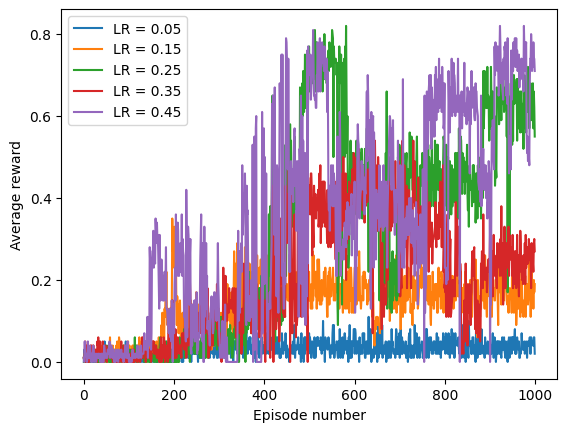

In [ ]:
import matplotlib.pyplot as plt

learning_rates = [0.05, 0.15, 0.25, 0.35, 0.45]

for lr in learning_rates:
  new_agent = create_Agent(learning_rate = lr)
  x_info, y_info = Iteration_Flow(new_agent, 1e3)
  plt.plot(x_info, y_info, label = f'LR = {lr}')

plt.xlabel('Episode number')
plt.ylabel('Average reward')
plt.legend()
plt.show()

100%|██████████| 1000/1000 [01:06<00:00, 15.06it/s]


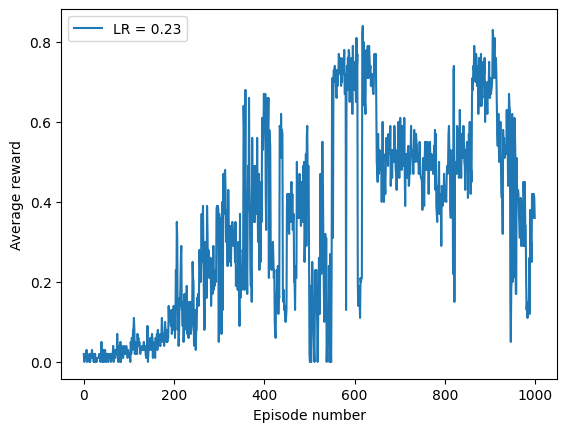

In [ ]:

new_agent = create_Agent(learning_rate = 0.23)
x_info, y_info = Iteration_Flow(new_agent, 1e3)
plt.plot(x_info, y_info, label = f'LR = 0.23')

plt.xlabel('Episode number')
plt.ylabel('Average reward')
plt.legend()
plt.show()